# Seaborn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds=sns.load_dataset('diamonds')
exercise=sns.load_dataset('exercise')
flights=sns.load_dataset('flights')
geyser=sns.load_dataset('geyser')
iris=sns.load_dataset('iris')
penguins=sns.load_dataset('penguins')
planets=sns.load_dataset('planets')
mpg=sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')

## distplot 

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [8]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
penguins.shape

(344, 7)

In [10]:
penguins = penguins.dropna()

In [11]:
penguins.shape

(333, 7)

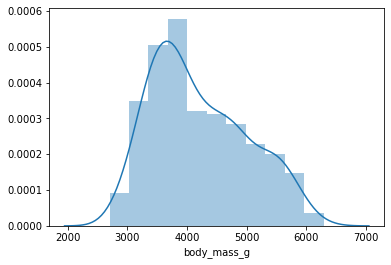

In [13]:
sns.distplot(penguins["body_mass_g"])

In [14]:
penguins["body_mass_g"].mean()

4207.057057057057

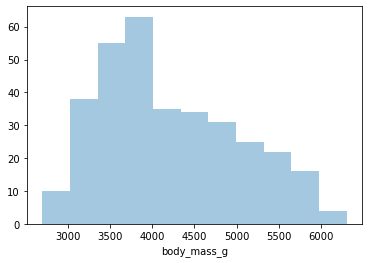

In [16]:
sns.distplot(penguins["body_mass_g"], kde=False) # with no-line

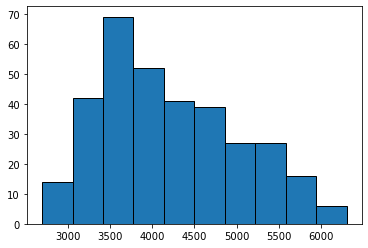

In [19]:
plt.hist(penguins["body_mass_g"], edgecolor="black");

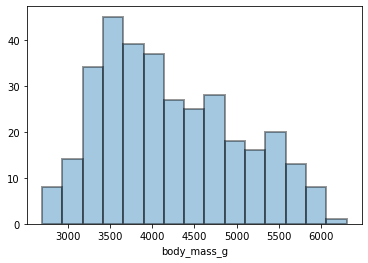

In [32]:
sns.distplot(penguins["body_mass_g"], hist_kws=dict(edgecolor="k", lw=2), kde=False, bins=15)
plt.show() #object adresini output olarak vermez

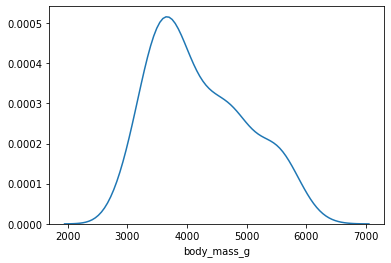

In [26]:
sns.distplot(penguins["body_mass_g"], hist=False)

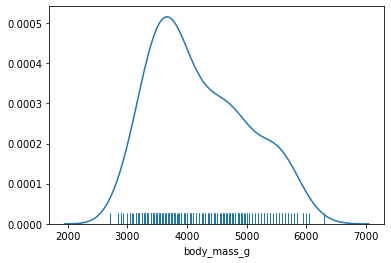

In [27]:
sns.distplot(penguins["body_mass_g"], hist=False, rug=True)

### distribution plots : distplot, kdeplot, rugplot

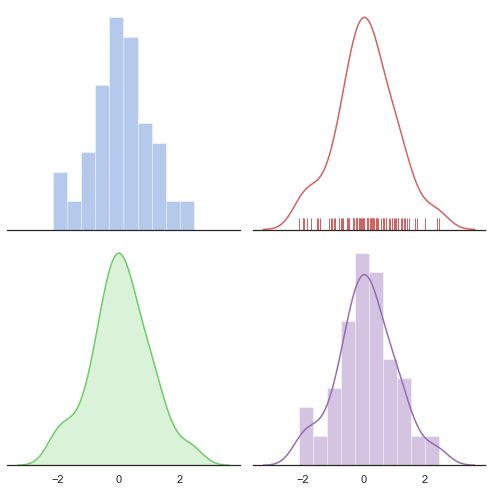

In [40]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])

plt.tight_layout()

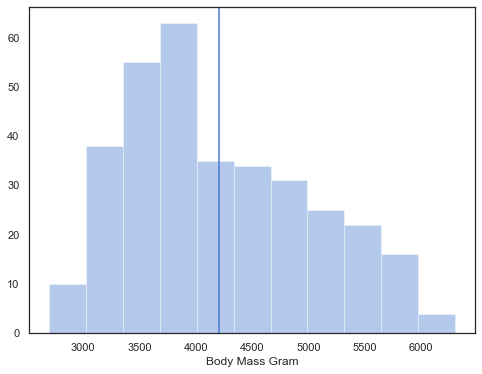

In [52]:
fig, ax = plt.subplots(figsize=(8,6))

sns.distplot(penguins["body_mass_g"], kde=False, ax=ax)
ax.axvline(penguins["body_mass_g"].mean())
ax.set_xlabel("Body Mass Gram")
plt.show()

-----------------

In [45]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


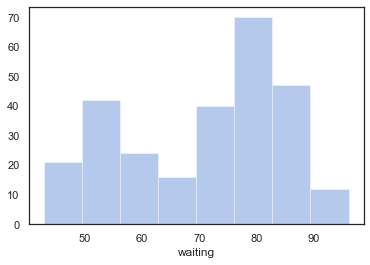

In [47]:
sns.distplot(geyser["waiting"], kde = False)

In [48]:
geyser["waiting"].mean()

70.8970588235294

--------------------

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


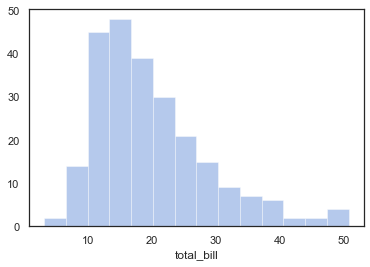

In [54]:
sns.distplot(tips["total_bill"], kde = False)
plt.show()

## jointplot

### hex, scatter, reg, kde

In [77]:
# from scipy import stats 

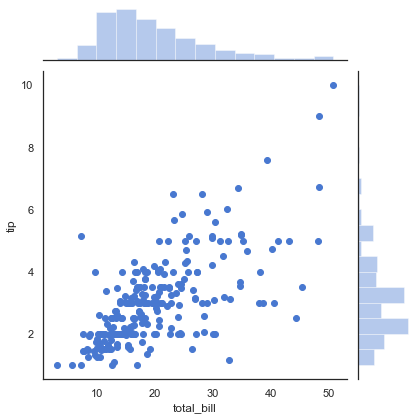

In [56]:
sns.jointplot("total_bill", "tip", data=tips, kind="scatter")

In [58]:
np.corrcoef(tips.total_bill, tips.tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [60]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Bonus

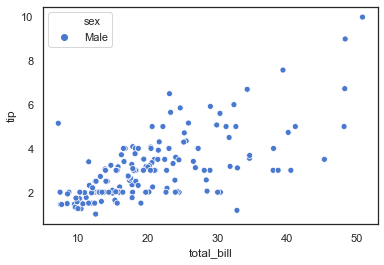

In [72]:
sns.scatterplot("total_bill", "tip", hue=tips[tips["sex"]=="Male"]["sex"], data=tips)

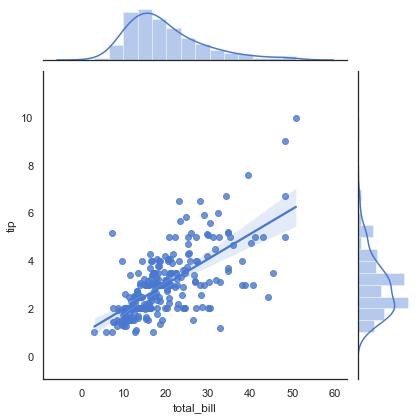

In [74]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg")
# shadow zone --> confidence interval (%5)

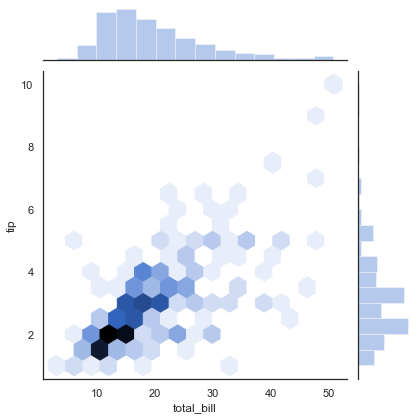

In [75]:
sns.jointplot("total_bill", "tip", data=tips, kind="hex")

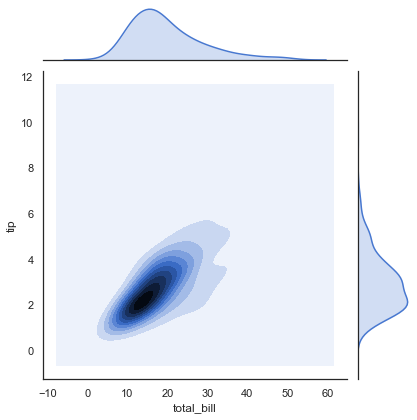

In [76]:
sns.jointplot("total_bill", "tip", data=tips, kind="kde")

---------

In [81]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


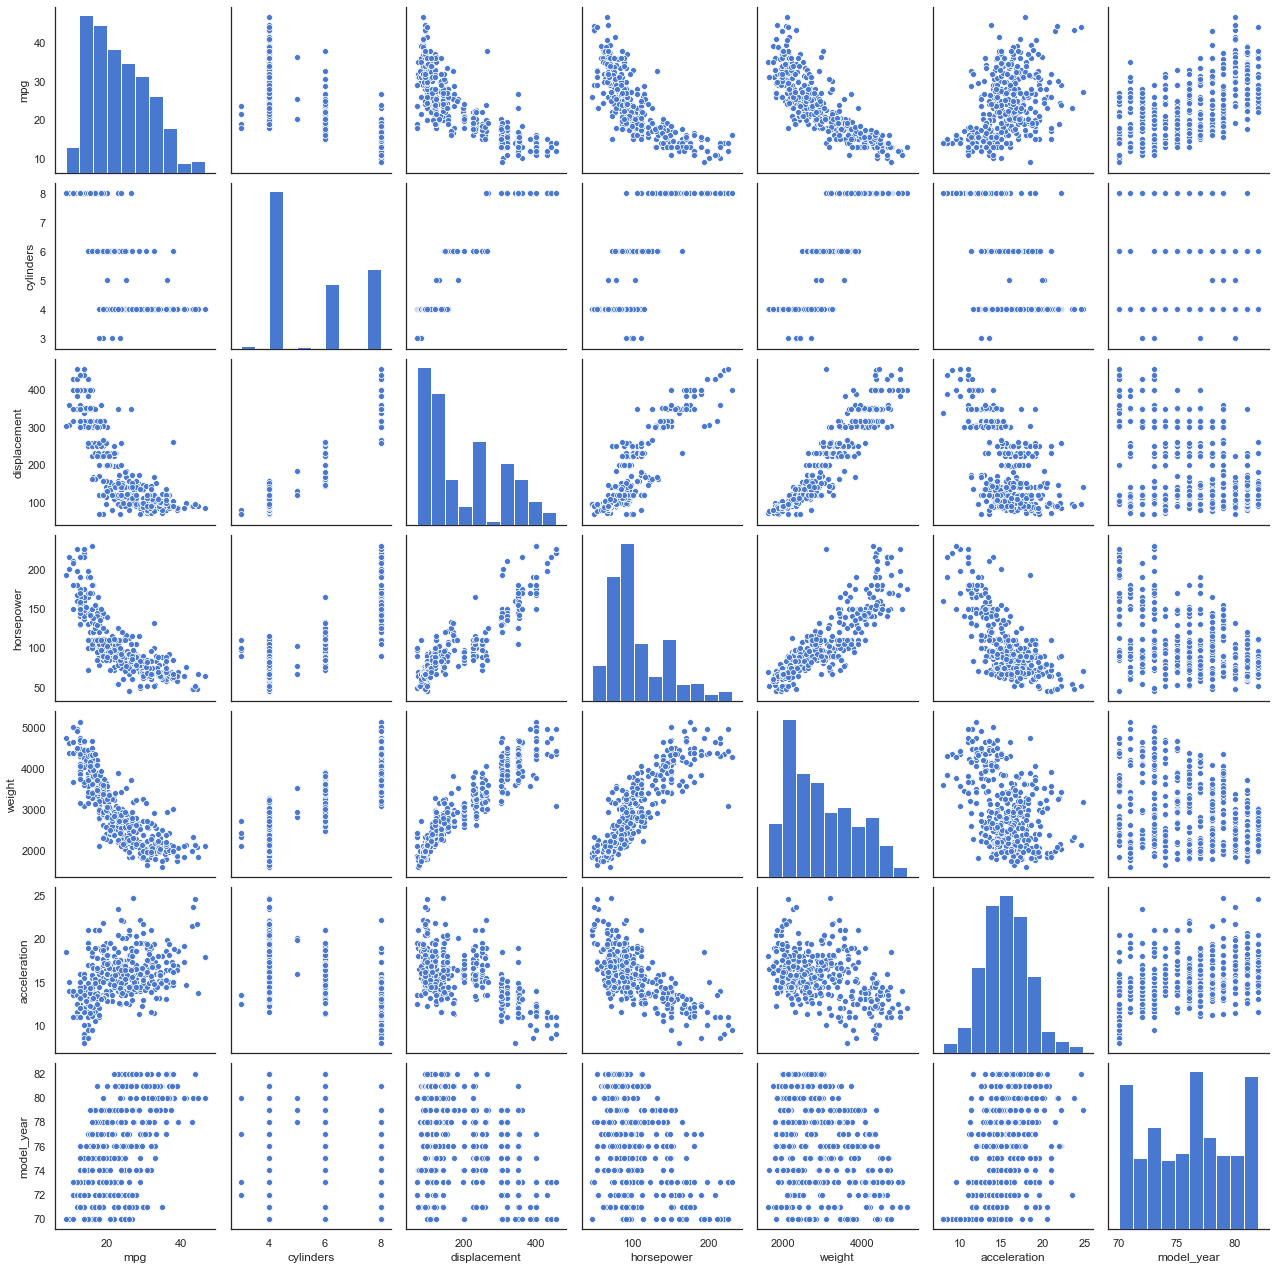

In [82]:
sns.pairplot(mpg)

In [85]:
mpg = mpg.drop(["displacement"], axis=1)

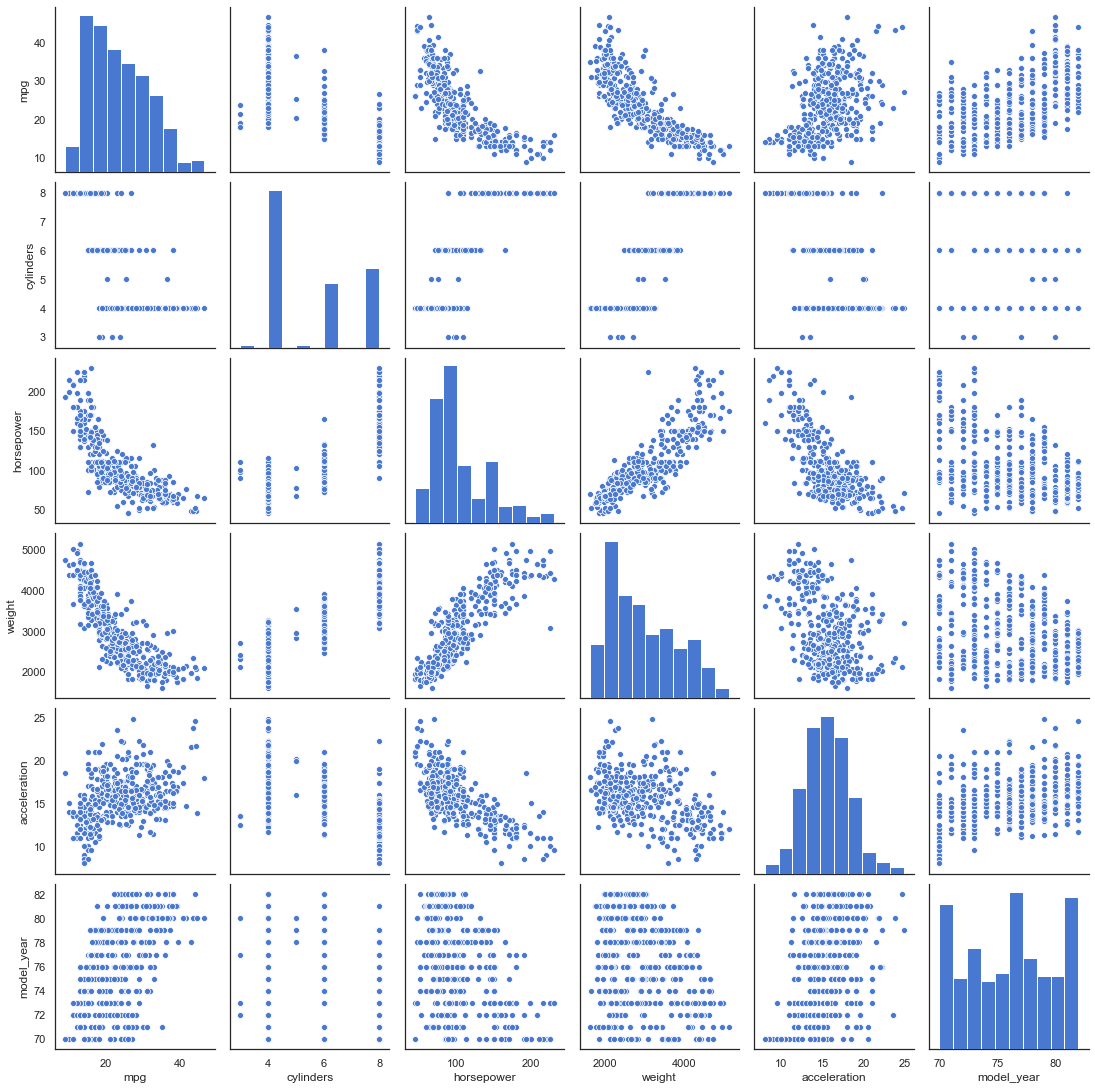

In [86]:
sns.pairplot(mpg)

In [87]:
mpg.groupby("model_year")["mpg"].mean()

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

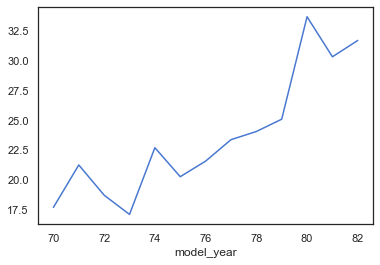

In [92]:
mpg.groupby("model_year")["mpg"].mean().plot()

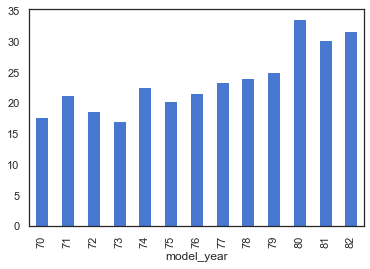

In [94]:
mpg.groupby("model_year")["mpg"].mean().plot.bar()

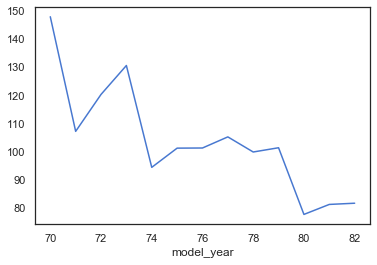

In [95]:
mpg.groupby("model_year")["horsepower"].mean().plot()

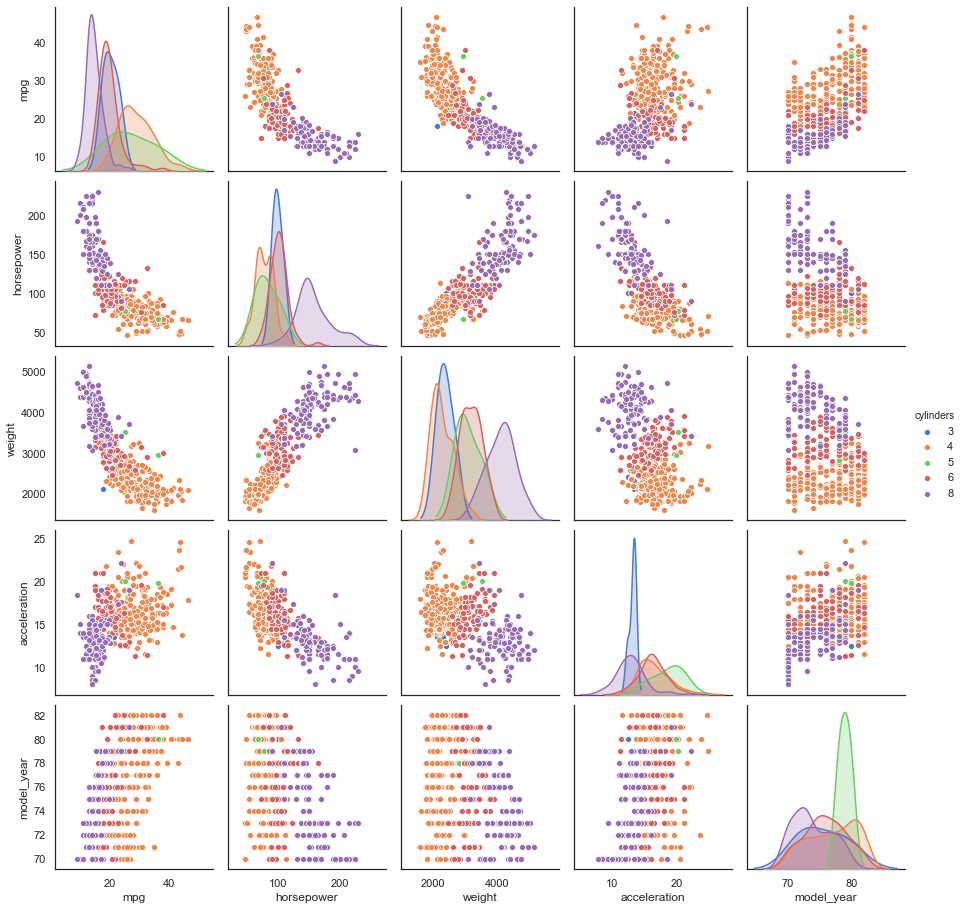

In [97]:
sns.pairplot(mpg, hue="cylinders")